<a href="https://colab.research.google.com/github/OM-VIT/Python-Machine-Learning-Notebooks/blob/main/Police_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### EDA Pkgs
import pandas as pd


In [77]:
# Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/police_department_data.csv")

In [ ]:
# Preview
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [ ]:
# Check Columns
df.columns

Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location'],
      dtype='object')

SQL

In [82]:
from sqlite3.dbapi2 import Cursor
# connecting to the database
connection = sqlite3.connect("/csv_db_7.sql")
 
# cursor
cursor = connection.cursor()
 
# print statement will execute if there
# are no errors
print("Connected to the database")

Connected to the database


In [ ]:
df['category'].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [ ]:
df['category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [ ]:
df['category'].value_counts().nlargest(20)

LARCENY/THEFT             40409
OTHER OFFENSES            19599
NON-CRIMINAL              17866
ASSAULT                   13577
VANDALISM                  8589
VEHICLE THEFT              6419
WARRANTS                   5914
BURGLARY                   5802
SUSPICIOUS OCC             5782
MISSING PERSON             4338
DRUG/NARCOTIC              4243
ROBBERY                    3299
FRAUD                      2635
SECONDARY CODES            1841
TRESPASS                   1812
WEAPON LAWS                1658
SEX OFFENSES, FORCIBLE      940
STOLEN PROPERTY             882
RECOVERED VEHICLE           736
DISORDERLY CONDUCT          658
Name: category, dtype: int64

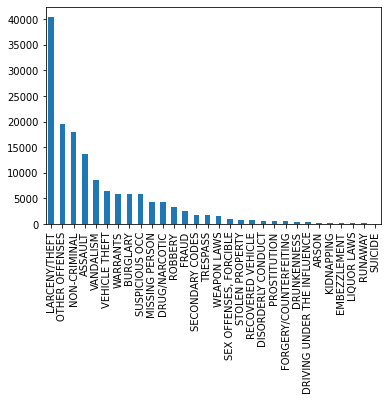

In [ ]:
# Plot the top value_counts
df['category'].value_counts().nlargest(30).plot(kind='bar')

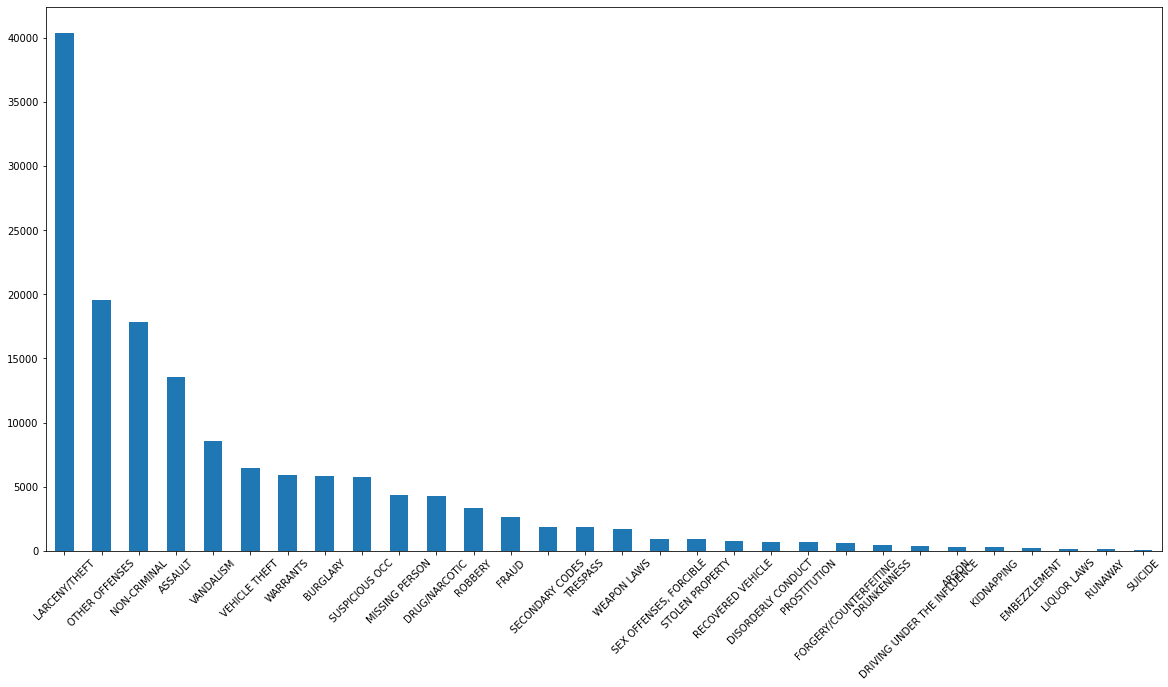

In [ ]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['category'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['department_district'].unique()

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK', nan],
      dtype=object)

In [ ]:
df['department_district'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: department_district, dtype: int64

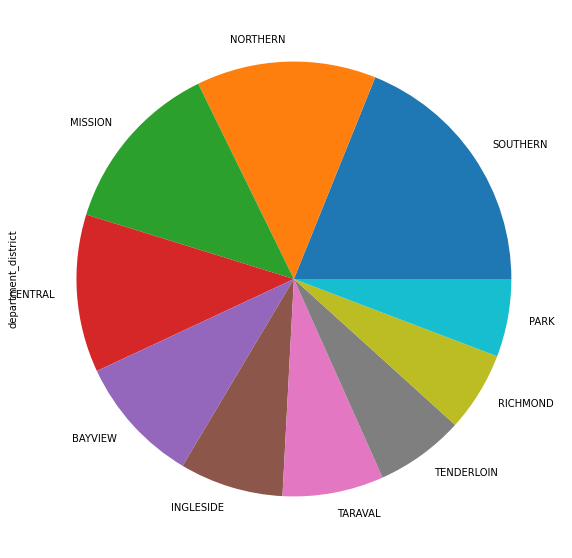

In [ ]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['department_district'].value_counts().plot(kind='pie')

plt.show()

In [100]:
df['category'].mode()[(df["department_district"] == 'BAYVIEW')]

Series([], dtype: object)

In [ ]:
df['resolution'].value_counts('department_district'=='SOUTHERN')

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: resolution, dtype: int64

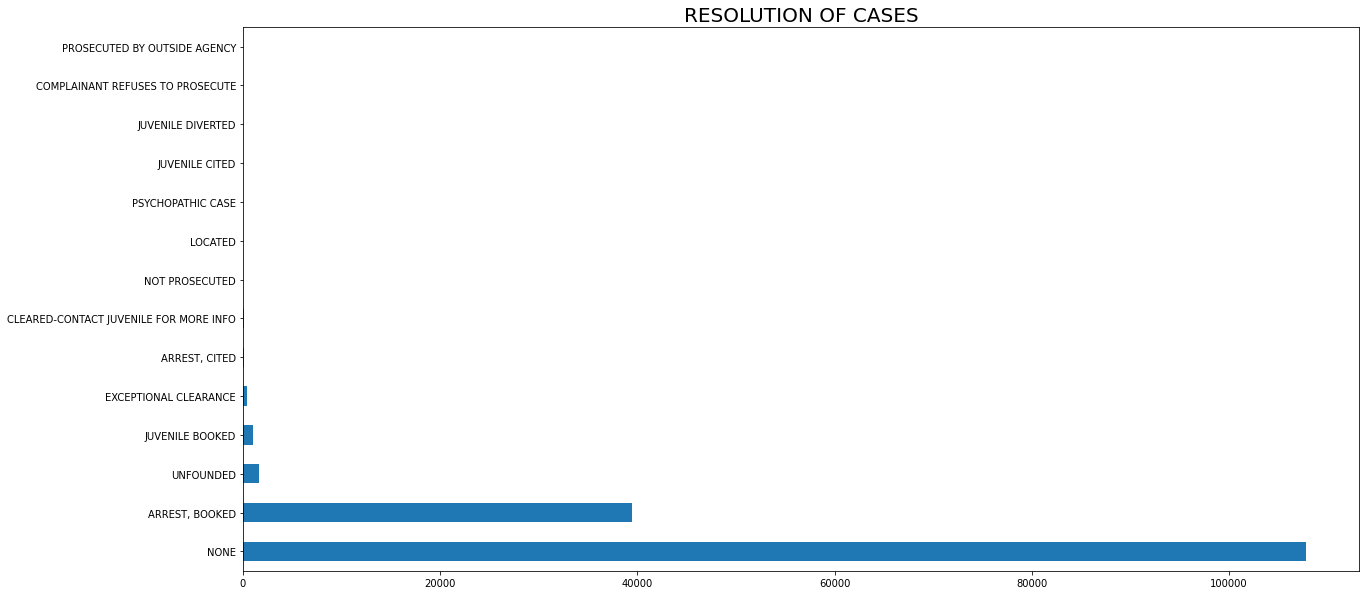

In [107]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
plt.title("RESOLUTION OF CASES",fontsize = 20)

df['resolution'].value_counts().nlargest(30).plot(kind='barh')

In [ ]:
df['address'].unique()

array(['800 Block of BRYANT ST', 'KEITH ST / SHAFTER AV',
       'JONES ST / OFARRELL ST', ..., '1400 Block of BRYANT ST',
       '100 Block of EDNA ST', '1800 Block of 26TH AV'], dtype=object)

In [ ]:
df['address'].value_counts('department_district'=='SOUTHERN')

800 Block of BRYANT ST         3561
800 Block of MARKET ST         1405
1000 Block of POTRERO AV        644
900 Block of MARKET ST          547
0 Block of UNITEDNATIONS PZ     452
                               ... 
UNIVERSITY ST / WOOLSEY ST        1
EUGENIA AV / GATES ST             1
0 Block of UPLAND DR              1
BALBOA ST / 24TH AV               1
1800 Block of 26TH AV             1
Name: address, Length: 16130, dtype: int64

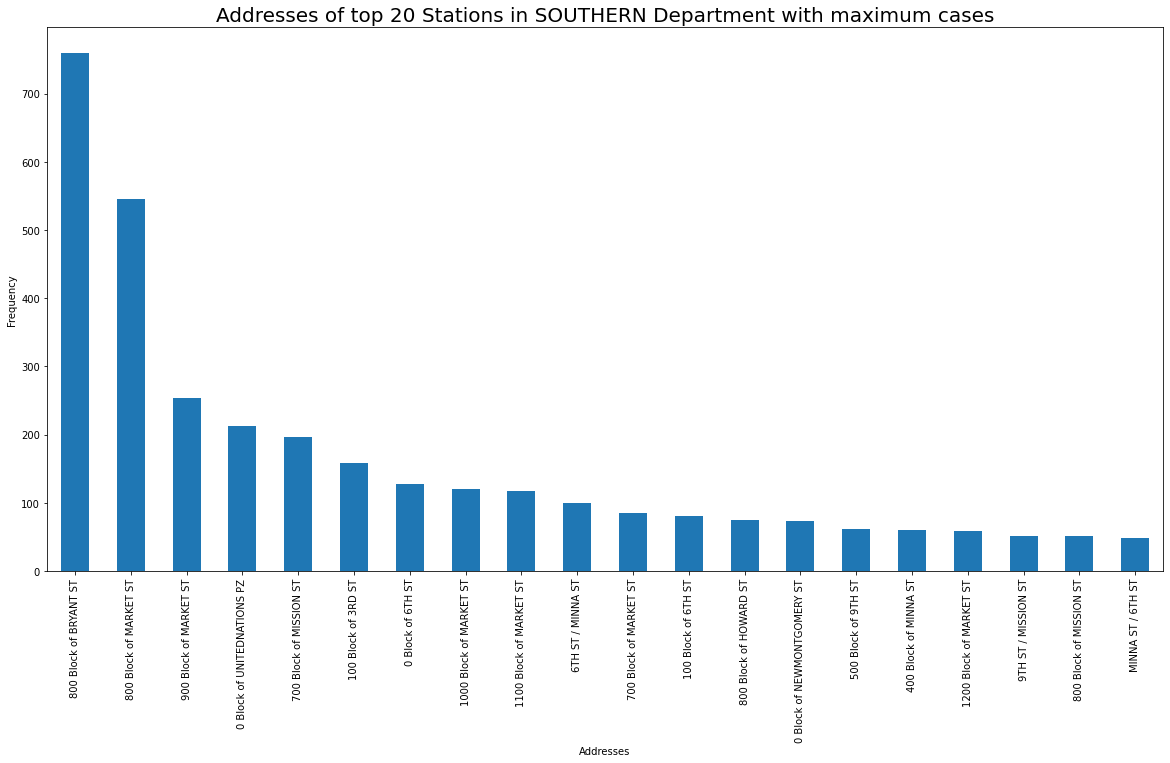

In [ ]:
fcat=df[['address','department_district']][(df["department_district"] == 'SOUTHERN') & (df["resolution"] == 'ARREST, BOOKED')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['address'].value_counts().nlargest(20).plot(ax=ax, kind='bar', xlabel='Addresses', ylabel='Frequency')
plt.title("Addresses of top 20 Stations in SOUTHERN Department with maximum cases",fontsize = 20)
plt.show()


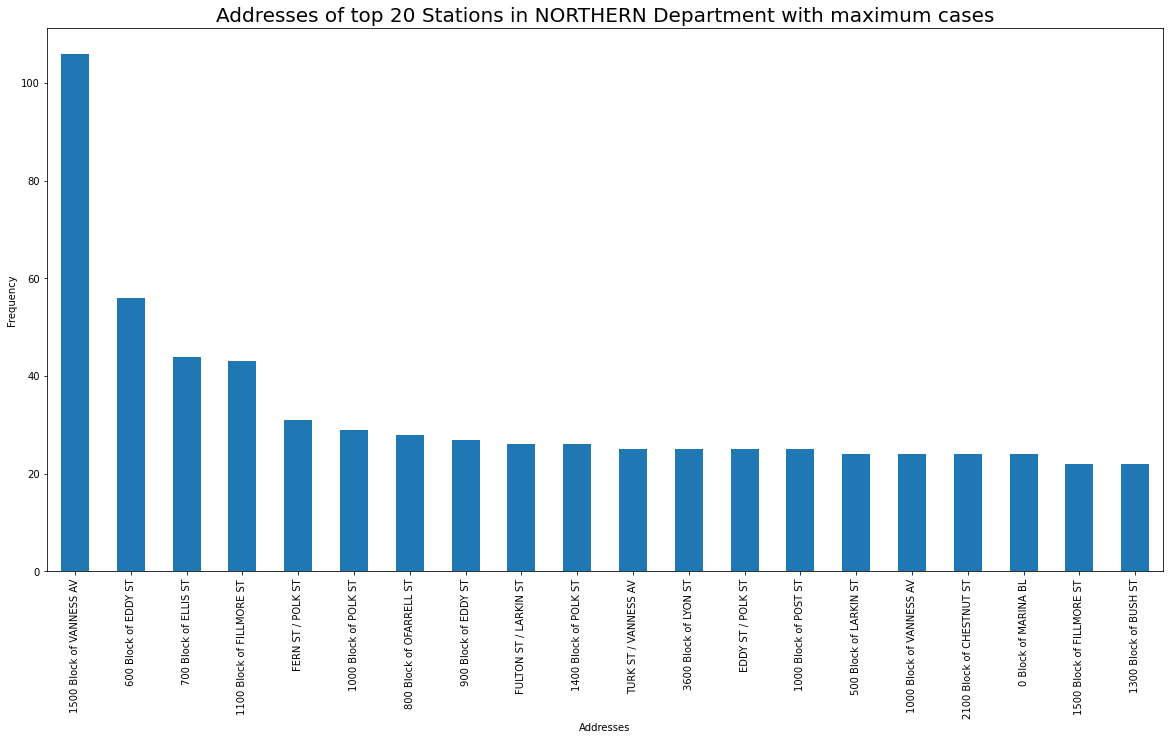

In [ ]:
fcat=df[['address','department_district']][(df["department_district"] == 'NORTHERN') & (df["resolution"] == 'ARREST, BOOKED')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['address'].value_counts().nlargest(20).plot(ax=ax, kind='bar', xlabel='Addresses', ylabel='Frequency')
plt.title("Addresses of top 20 Stations in NORTHERN Department with maximum cases",fontsize = 20)
plt.show()

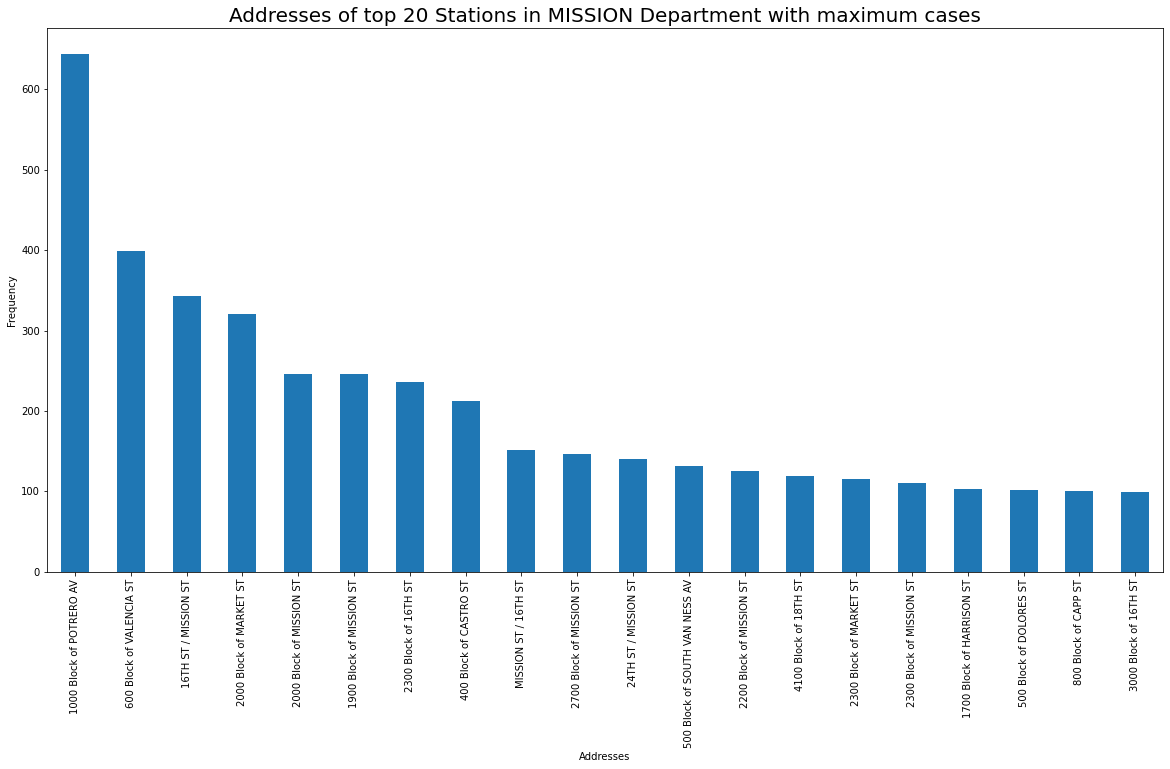

In [ ]:
fcat=df[['address','department_district']][(df["department_district"] == 'MISSION')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['address'].value_counts().nlargest(20).plot(ax=ax, kind='bar', xlabel='Addresses', ylabel='Frequency')
plt.title("Addresses of top 20 Stations in MISSION Department with maximum cases",fontsize = 20)
plt.show()

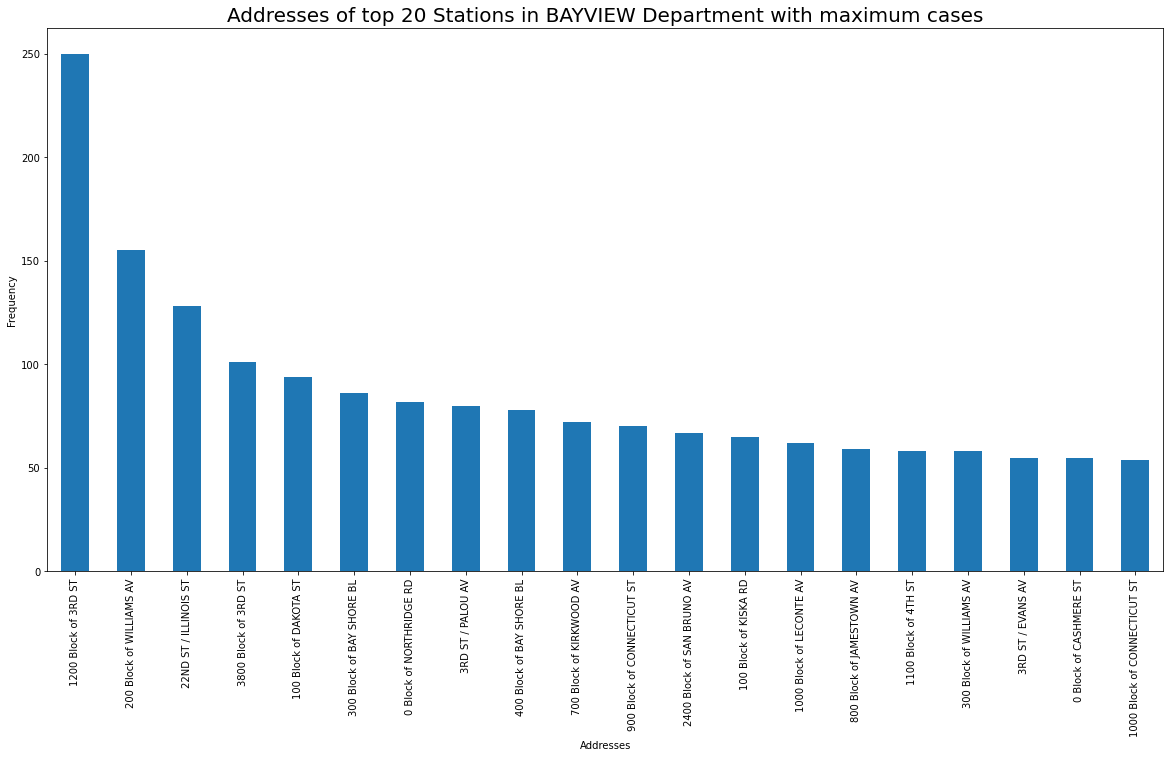

In [ ]:
fcat=df[['address','department_district']][(df["department_district"] == 'BAYVIEW')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['address'].value_counts().nlargest(20).plot(ax=ax, kind='bar', xlabel='Addresses', ylabel='Frequency')
plt.title("Addresses of top 20 Stations in BAYVIEW Department with maximum cases",fontsize = 20)
plt.show()

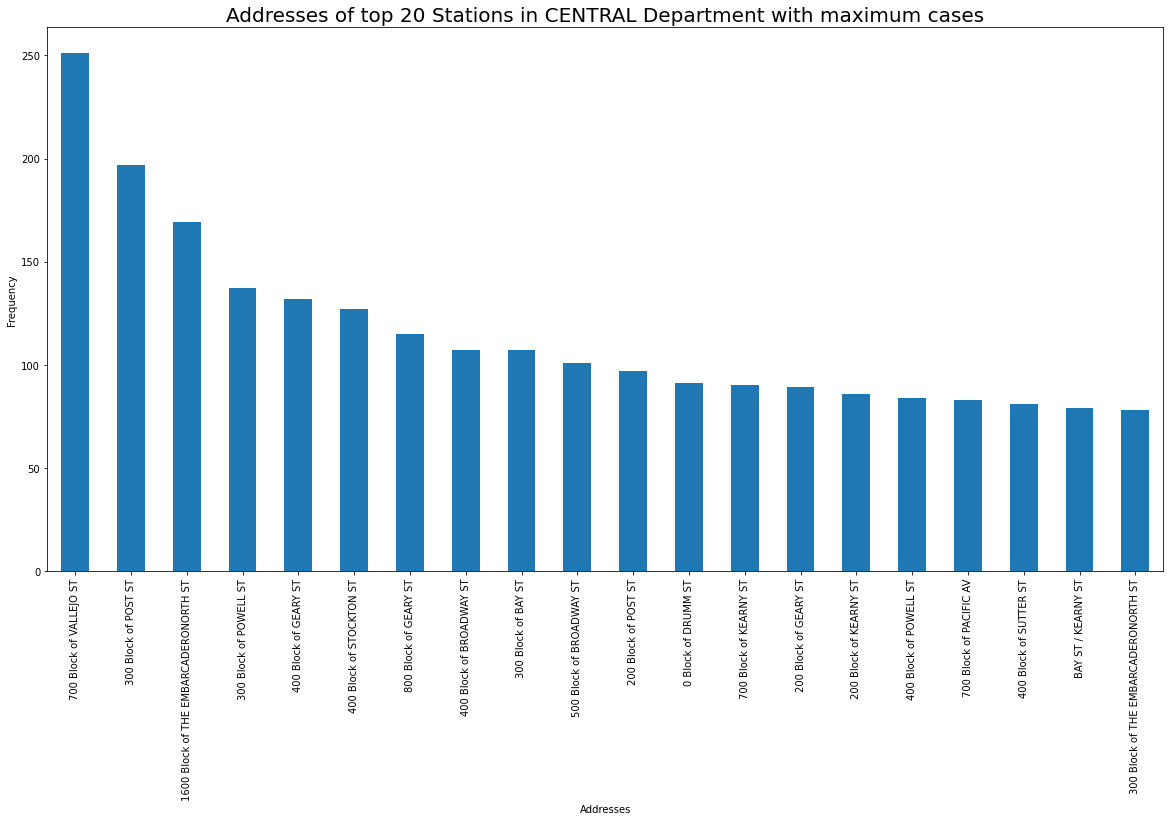

In [ ]:
fcat=df[['address','department_district']][(df["department_district"] == 'CENTRAL')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['address'].value_counts().nlargest(20).plot(ax=ax, kind='bar', xlabel='Addresses', ylabel='Frequency')
plt.title("Addresses of top 20 Stations in CENTRAL Department with maximum cases",fontsize = 20)
plt.show()

In [181]:
fcat=df[['category','department_district']][(df["department_district"] == 'MISSION') & (df["resolution"] == 'JUVENILE BOOKED')]


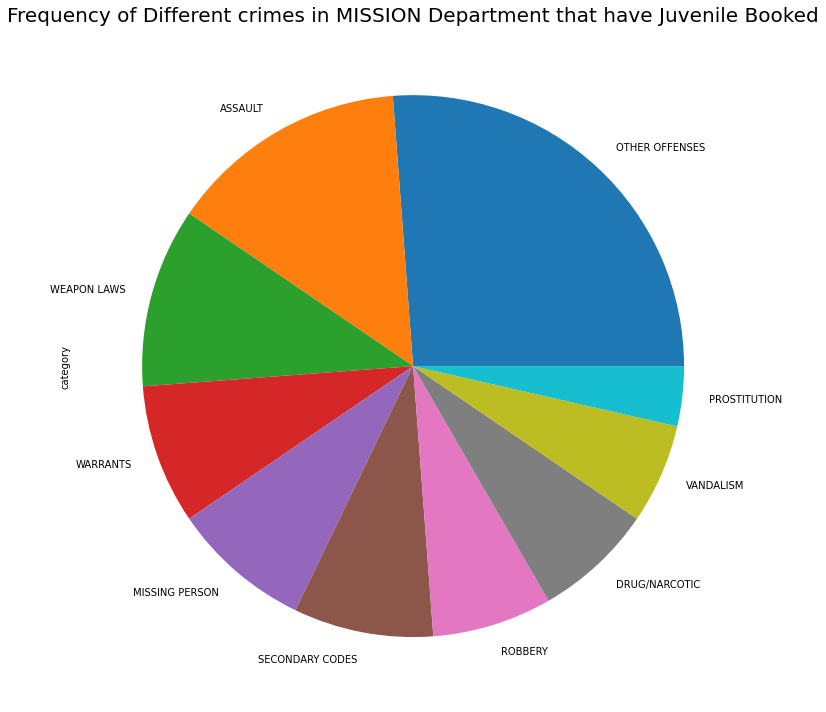

In [182]:
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='pie')
plt.title("Frequency of Different crimes in MISSION Department that have Juvenile Booked",fontsize = 20)

plt.show()

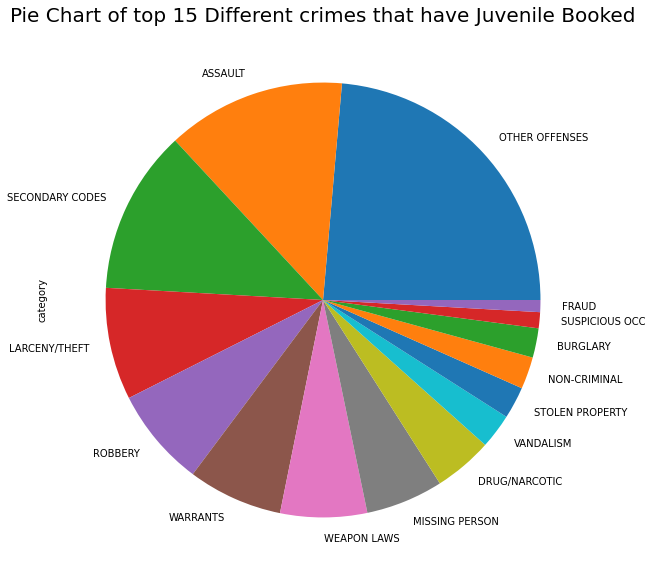

In [87]:
fcat=df[['category','department_district']][(df["resolution"] == 'JUVENILE BOOKED')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(15).plot(ax=ax, kind='pie')
plt.title("Pie Chart of top 15 Different crimes that have Juvenile Booked",fontsize = 20)
plt.show()


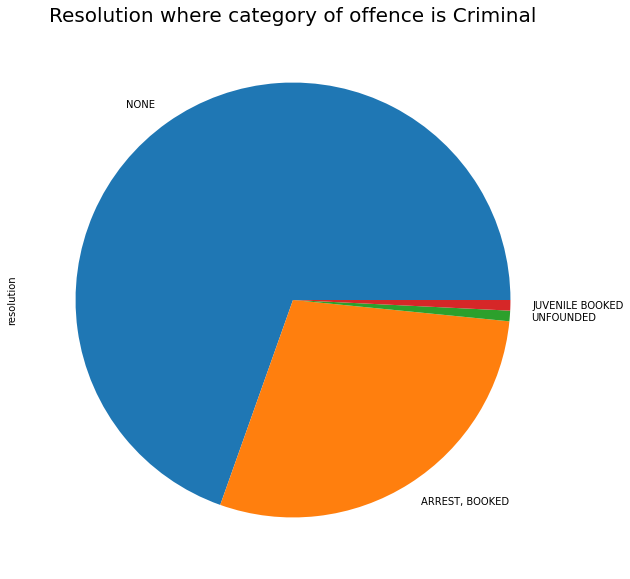

In [112]:
fcat=df[['resolution','department_district']][(df["category"] != 'NON-CRIMINAL')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['resolution'].value_counts().nlargest(4).plot(ax=ax, kind='pie')
plt.title("Resolution where category of offence is Criminal",fontsize = 20)
plt.show()

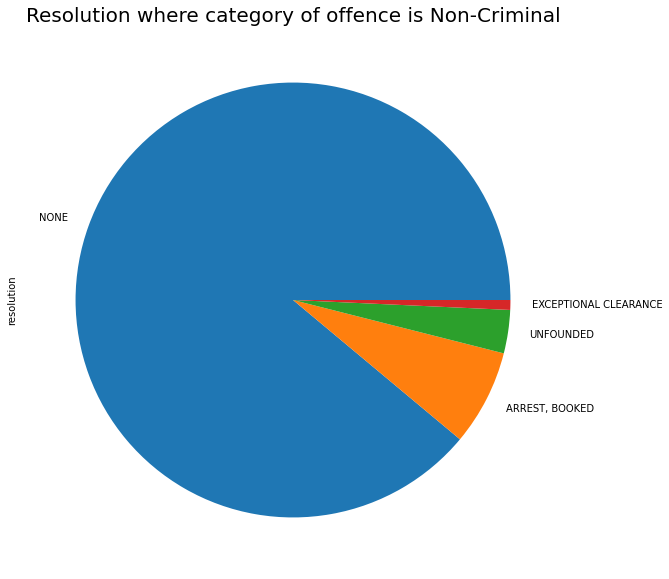

In [111]:
fcat=df[['resolution','department_district']][(df["category"] == 'NON-CRIMINAL')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['resolution'].value_counts().nlargest(4).plot(ax=ax, kind='pie')
plt.title("Resolution where category of offence is Non-Criminal",fontsize = 20)
plt.show()

In [ ]:
fcat=df[['category','department_district']][(df["resolution"] == 'JUVENILE BOOKED')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(15).plot(ax=ax, kind='pie')
plt.title("Pie Chart of top 15 Different crimes that have Juvenile Booked",fontsize = 20)
plt.show()

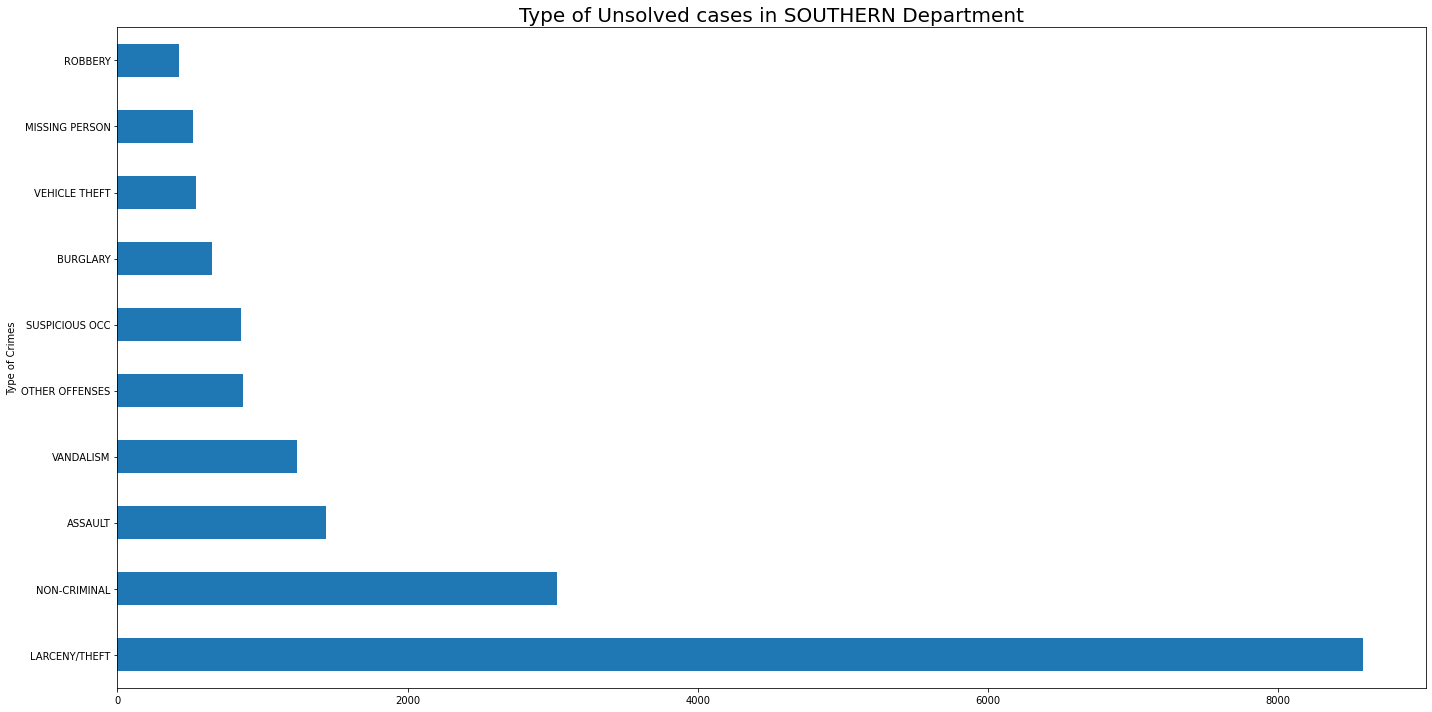

              category department_district
37        NON-CRIMINAL            SOUTHERN
41             ASSAULT            SOUTHERN
43        NON-CRIMINAL            SOUTHERN
48      MISSING PERSON            SOUTHERN
49      MISSING PERSON            SOUTHERN
...                ...                 ...
150484    NON-CRIMINAL            SOUTHERN
150485    NON-CRIMINAL            SOUTHERN
150489           FRAUD            SOUTHERN
150491         ASSAULT            SOUTHERN
150499  OTHER OFFENSES            SOUTHERN

[19662 rows x 2 columns]


In [156]:
fcat=df[['category','department_district']][(df["department_district"] == 'SOUTHERN') & (df["resolution"] == 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='barh', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Unsolved cases in SOUTHERN Department" ,fontsize = 20)
plt.show()
print(fcat)

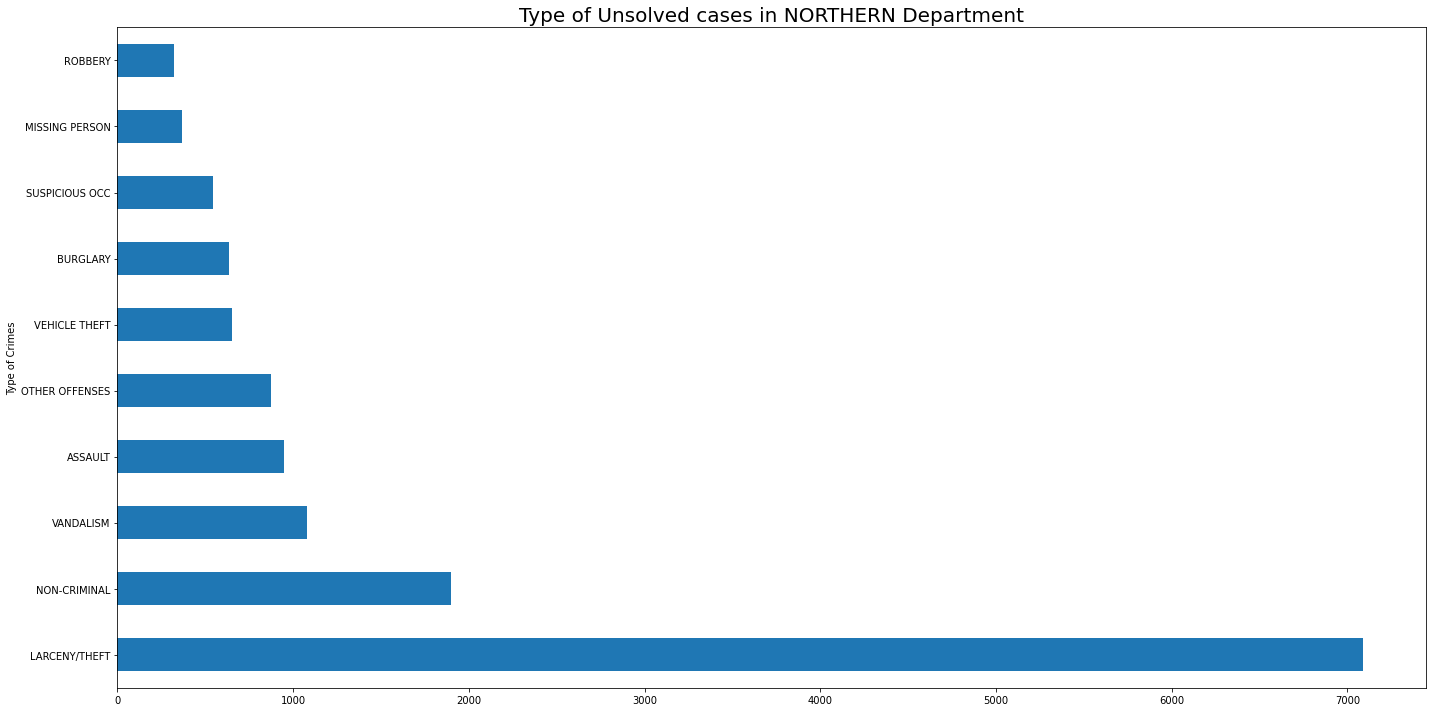

              category department_district
5              ASSAULT            NORTHERN
20               FRAUD            NORTHERN
52       VEHICLE THEFT            NORTHERN
62      MISSING PERSON            NORTHERN
63      MISSING PERSON            NORTHERN
...                ...                 ...
150450         ASSAULT            NORTHERN
150451  SUSPICIOUS OCC            NORTHERN
150453    NON-CRIMINAL            NORTHERN
150463    NON-CRIMINAL            NORTHERN
150470           FRAUD            NORTHERN

[15489 rows x 2 columns]


In [157]:
fcat=df[['category','department_district']][(df["department_district"] == 'NORTHERN') & (df["resolution"] == 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='barh', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Unsolved cases in NORTHERN Department" ,fontsize = 20)   
plt.show()
print(fcat)

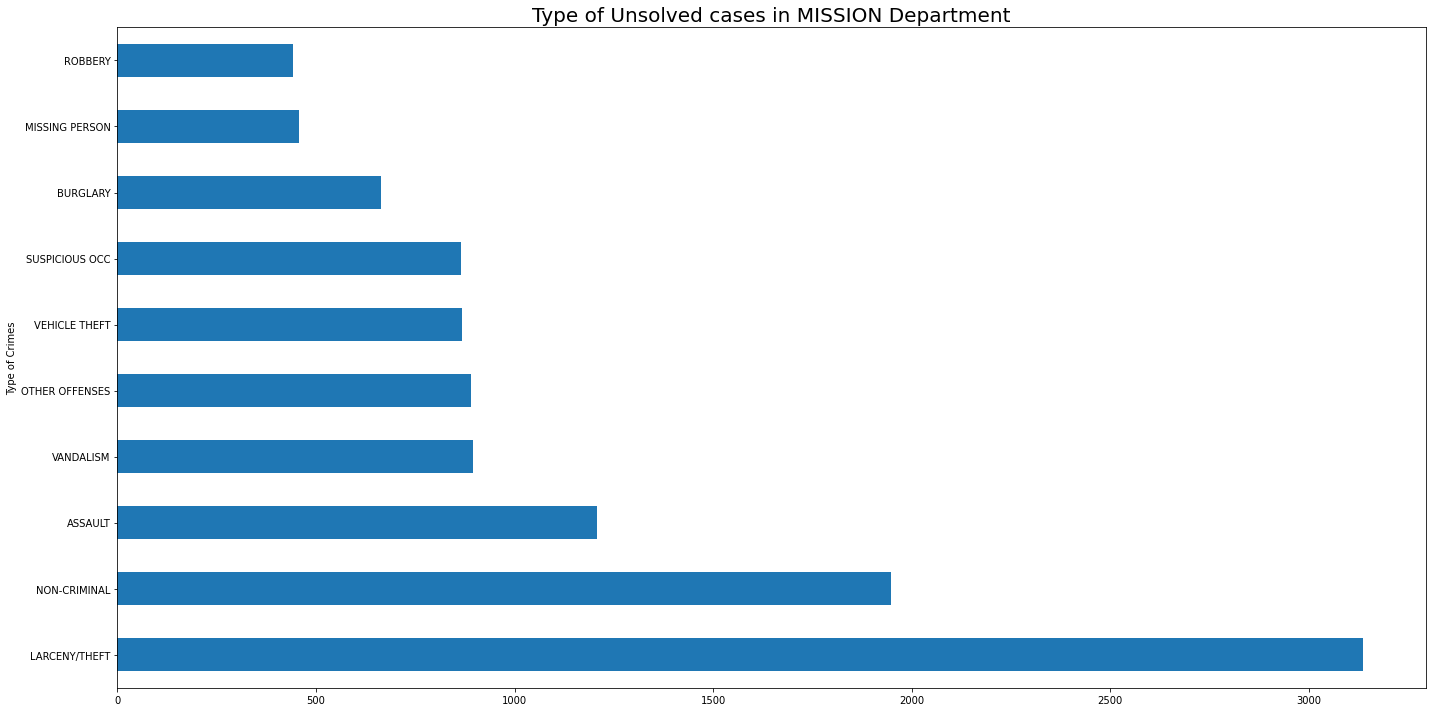

              category department_district
4         NON-CRIMINAL             MISSION
16             ROBBERY             MISSION
17             ASSAULT             MISSION
26      OTHER OFFENSES             MISSION
42       LARCENY/THEFT             MISSION
...                ...                 ...
150444         ROBBERY             MISSION
150469   LARCENY/THEFT             MISSION
150488    NON-CRIMINAL             MISSION
150492         ASSAULT             MISSION
150493         ASSAULT             MISSION

[12554 rows x 2 columns]


In [166]:
fcat=df[['category','department_district']][(df["department_district"] == 'MISSION') & (df["resolution"] == 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='barh', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Unsolved cases in MISSION Department" ,fontsize = 20)
plt.show()
print(fcat)

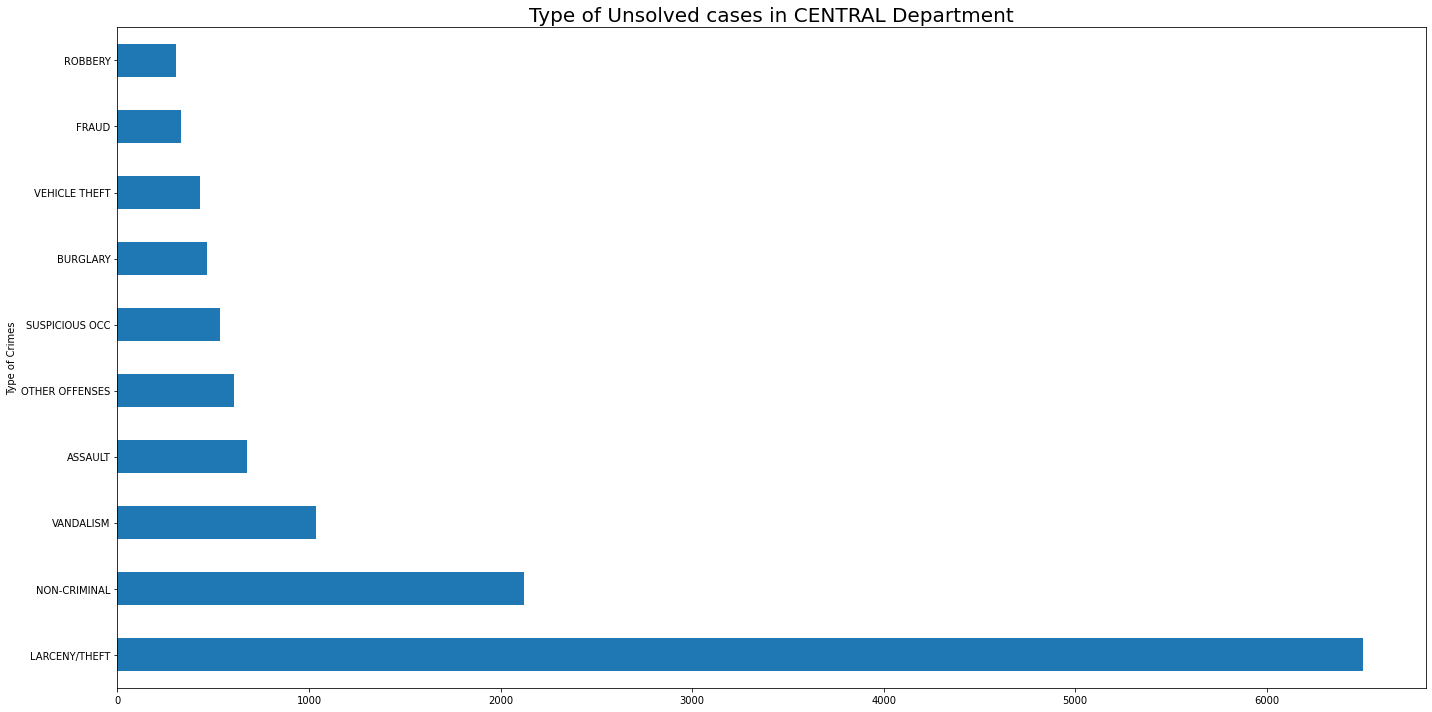

             category department_district
14           BURGLARY             CENTRAL
30      VEHICLE THEFT             CENTRAL
31      VEHICLE THEFT             CENTRAL
58            ASSAULT             CENTRAL
66       NON-CRIMINAL             CENTRAL
...               ...                 ...
150480   NON-CRIMINAL             CENTRAL
150486  LARCENY/THEFT             CENTRAL
150496   NON-CRIMINAL             CENTRAL
150497  LARCENY/THEFT             CENTRAL
150498  LARCENY/THEFT             CENTRAL

[13759 rows x 2 columns]


In [167]:
fcat=df[['category','department_district']][(df["department_district"] == 'CENTRAL') & (df["resolution"] == 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='barh', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Unsolved cases in CENTRAL Department" ,fontsize = 20)
plt.show()
print(fcat)

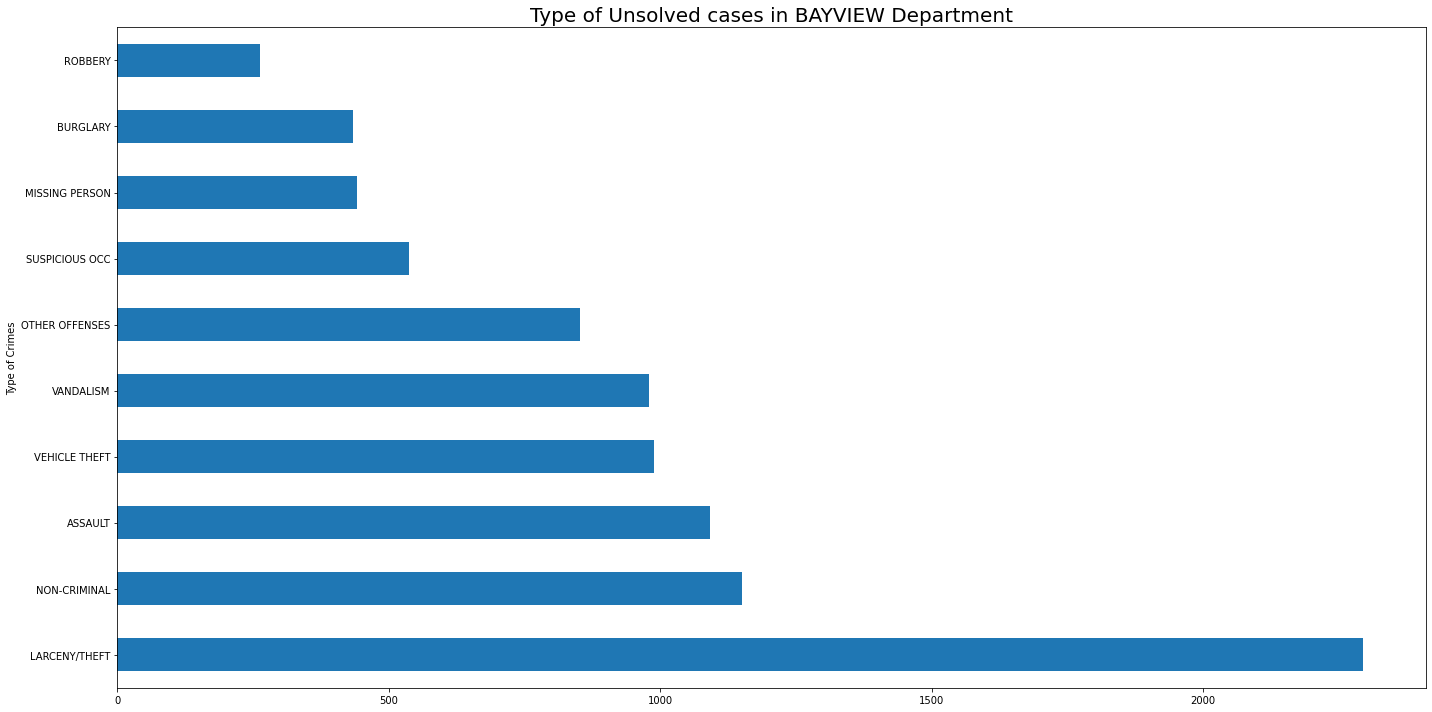

               category department_district
9        MISSING PERSON             BAYVIEW
65         NON-CRIMINAL             BAYVIEW
171      OTHER OFFENSES             BAYVIEW
187               FRAUD             BAYVIEW
219            BURGLARY             BAYVIEW
...                 ...                 ...
150445    VEHICLE THEFT             BAYVIEW
150458          ASSAULT             BAYVIEW
150465          ASSAULT             BAYVIEW
150490          ASSAULT             BAYVIEW
150494  SECONDARY CODES             BAYVIEW

[10078 rows x 2 columns]


In [168]:
fcat=df[['category','department_district']][(df["department_district"] == 'BAYVIEW') & (df["resolution"] == 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='barh', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Unsolved cases in BAYVIEW Department" ,fontsize = 20)
plt.show()
print(fcat)

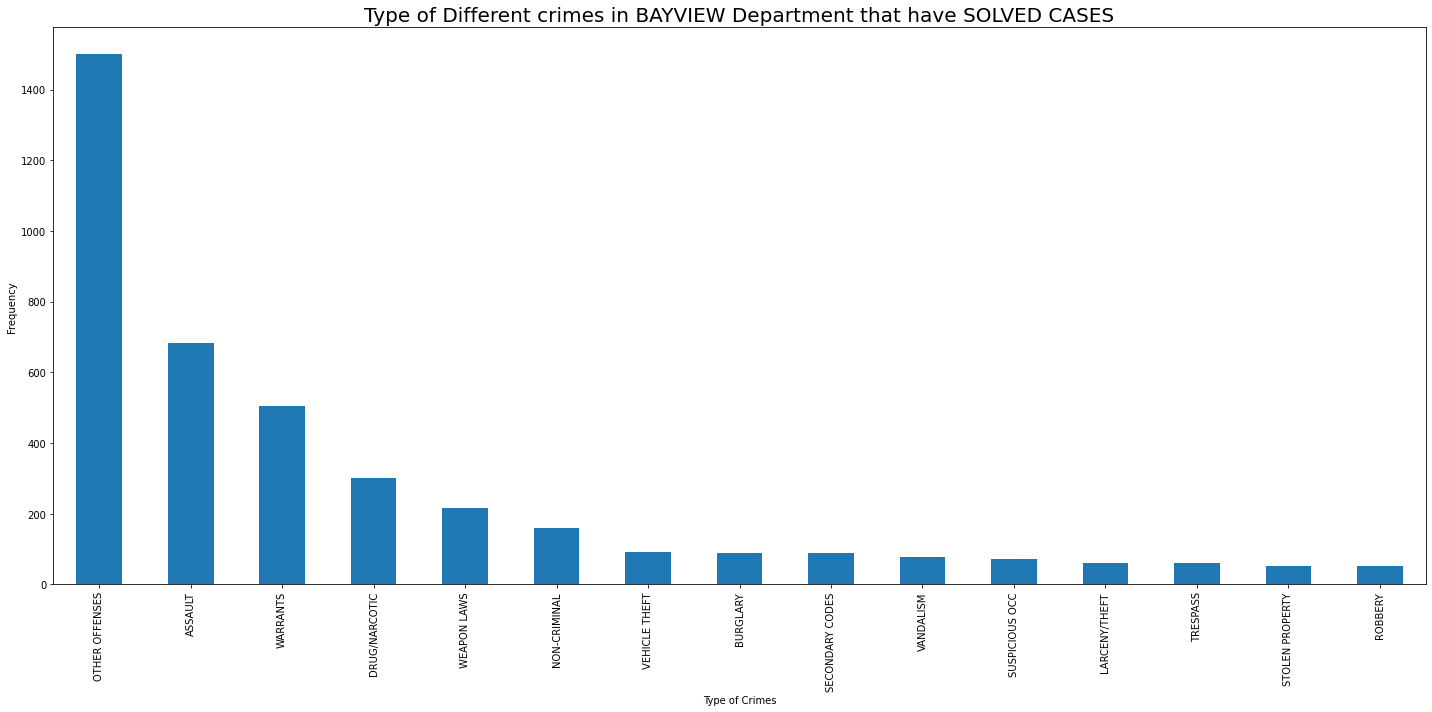

              category department_district
2             WARRANTS             BAYVIEW
12      OTHER OFFENSES             BAYVIEW
54            WARRANTS             BAYVIEW
60      OTHER OFFENSES             BAYVIEW
74      OTHER OFFENSES             BAYVIEW
...                ...                 ...
150286        WARRANTS             BAYVIEW
150294   VEHICLE THEFT             BAYVIEW
150326     DRUNKENNESS             BAYVIEW
150327  OTHER OFFENSES             BAYVIEW
150392  OTHER OFFENSES             BAYVIEW

[4225 rows x 2 columns]


In [162]:
fcat=df[['category','department_district']][(df["department_district"] == 'BAYVIEW') & (df["resolution"] != 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(15).plot(ax=ax, kind='bar', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Different crimes in BAYVIEW Department that have SOLVED CASES" ,fontsize = 20)
plt.show()
print(fcat)

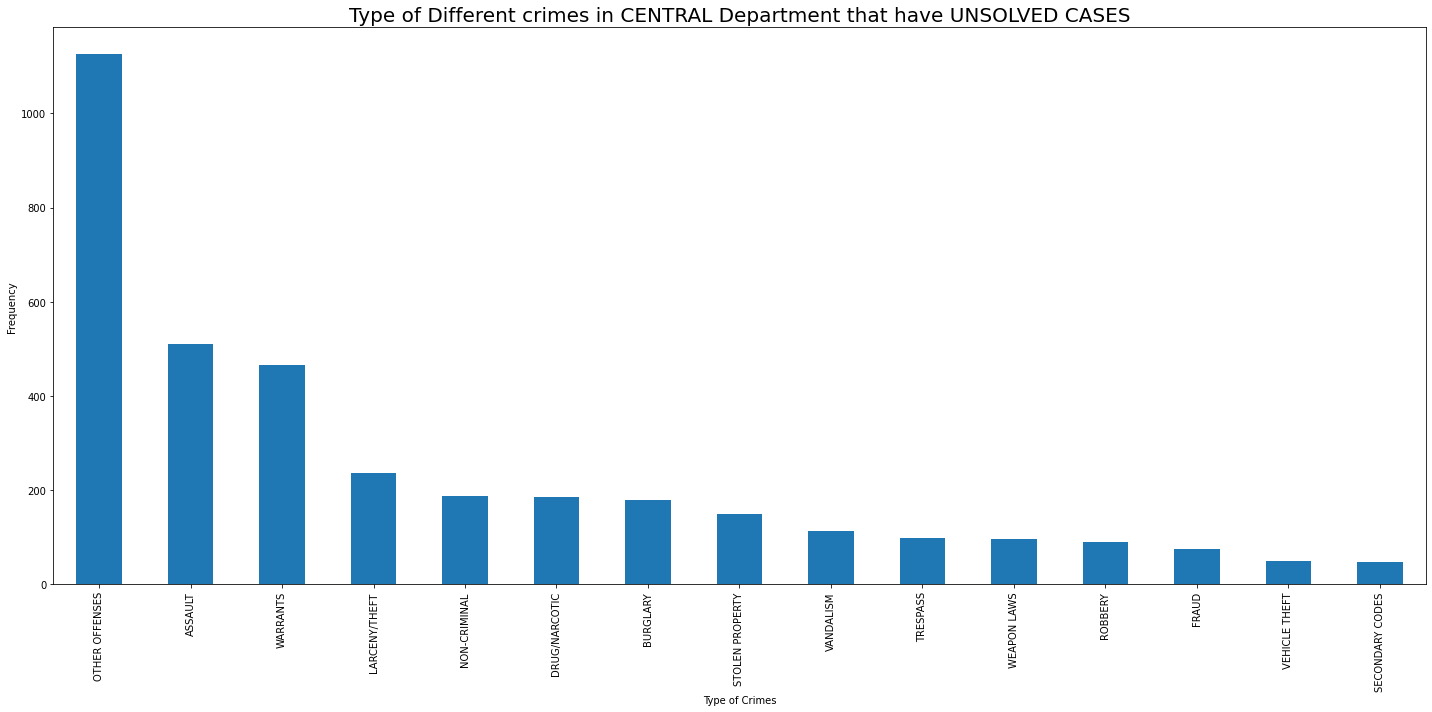

                      category department_district
67                    WARRANTS             CENTRAL
84                 DRUNKENNESS             CENTRAL
137                   WARRANTS             CENTRAL
140                  VANDALISM             CENTRAL
157             OTHER OFFENSES             CENTRAL
...                        ...                 ...
150289  SEX OFFENSES, FORCIBLE             CENTRAL
150290                 ASSAULT             CENTRAL
150291                 ASSAULT             CENTRAL
150314          OTHER OFFENSES             CENTRAL
150374          OTHER OFFENSES             CENTRAL

[3907 rows x 2 columns]


In [160]:
fcat=df[['category','department_district']][(df["department_district"] == 'CENTRAL') & (df["resolution"] != 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(15).plot(ax=ax, kind='bar', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Different crimes in CENTRAL Department that have UNSOLVED CASES" ,fontsize = 20)
plt.show()
print(fcat)

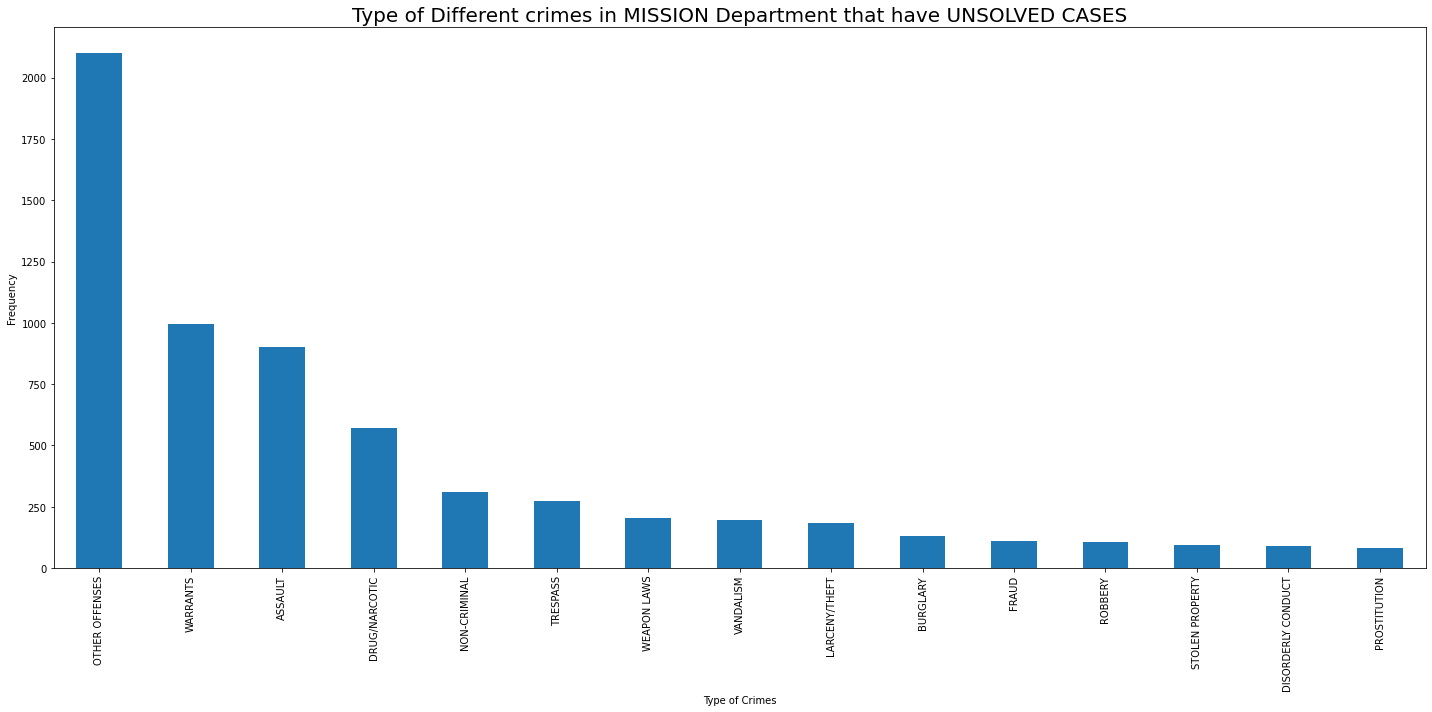

                 category department_district
22          DRUG/NARCOTIC             MISSION
23         OTHER OFFENSES             MISSION
28         OTHER OFFENSES             MISSION
34      RECOVERED VEHICLE             MISSION
35         OTHER OFFENSES             MISSION
...                   ...                 ...
150178       NON-CRIMINAL             MISSION
150196     OTHER OFFENSES             MISSION
150202            ROBBERY             MISSION
150227       PROSTITUTION             MISSION
150422     OTHER OFFENSES             MISSION

[6949 rows x 2 columns]


In [161]:
fcat=df[['category','department_district']][(df["department_district"] == 'MISSION') & (df["resolution"] != 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(15).plot(ax=ax, kind='bar', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Different crimes in MISSION Department that have UNSOLVED CASES" ,fontsize = 20)
plt.show()
print(fcat)

In [ ]:
print(df[['category','department_district']][(df["department_district"] == 'CENTRAL')].mode())


        category department_district
0  LARCENY/THEFT             CENTRAL


In [ ]:
print(df[['category','department_district','resolution']][(df["department_district"] == 'SOUTHERN')][(df["category"] == 'OTHER OFFENSES') ][(df["resolution"] == 'ARREST, BOOKED')])


              category department_district      resolution
6       OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
69      OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
132     OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
161     OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
206     OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
...                ...                 ...             ...
150306  OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
150333  OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
150348  OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
150382  OTHER OFFENSES            SOUTHERN  ARREST, BOOKED
150384  OTHER OFFENSES            SOUTHERN  ARREST, BOOKED

[2362 rows x 3 columns]


In [ ]:
fcat=df[['category','department_district'].mode()][(df["department_district"] == 'SOUTHERN') & (df["resolution"] == 'ARREST, BOOKED')]
print(fcat)

AttributeError: ignored

In [ ]:
if(df['department_district']=='SOUTHERN'):
  print((df['category']).mode())

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
fcat['department_district'].value_counts().plot(ax=ax, kind='bar', xlabel='Deartment District', ylabel='frequency')
plt.title("Departments where cases have no resolution")
plt.show()

In [ ]:
df['department_district'].mode() 

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],

                   'radius': [2439.7, 6051.8, 6378.1]},

                  index=['Mercury', 'Venus', 'Earth'])

plot = df.plot.pie(y='mass', figsize=(5, 5))


In [ ]:
SOLVED=df["resolution" != 'NONE'][(df["department_district"] == 'NORTHERN')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(15).plot(ax=ax, kind='bar', xlabel='Type of Crimes', ylabel='Frequency')
plt.title("Type of Different crimes in NORTHERN Department that have SOLVED CASES" ,fontsize = 20)
plt.show()
print(fcat)

KeyError: ignored

SPARE

In [ ]:
fcat=df[['category','department_district']][(df["department_district"] == 'SOUTHERN') & (df["resolution"] == 'JUVENILE BOOKED')]


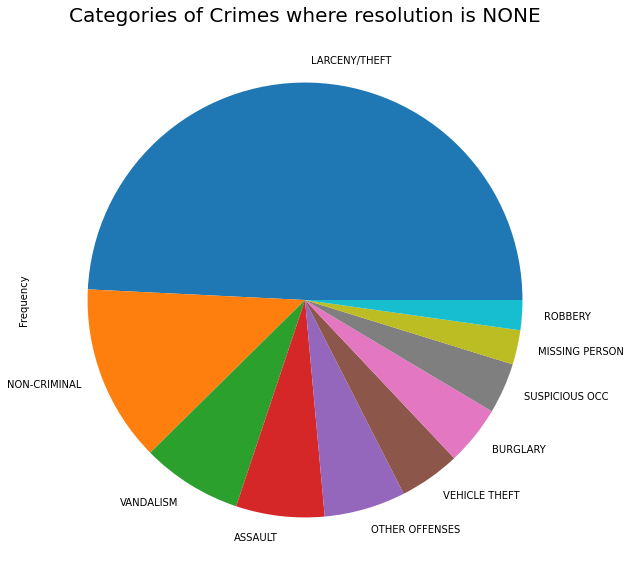

In [110]:
fcat=df[['category','department_district']][(df["department_district"] == 'NORTHERN') & (df["resolution"] == 'NONE')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='pie', xlabel='categories', ylabel='Frequency')
plt.title("Categories of Crimes where resolution is NONE",fontsize = 20)
plt.show()

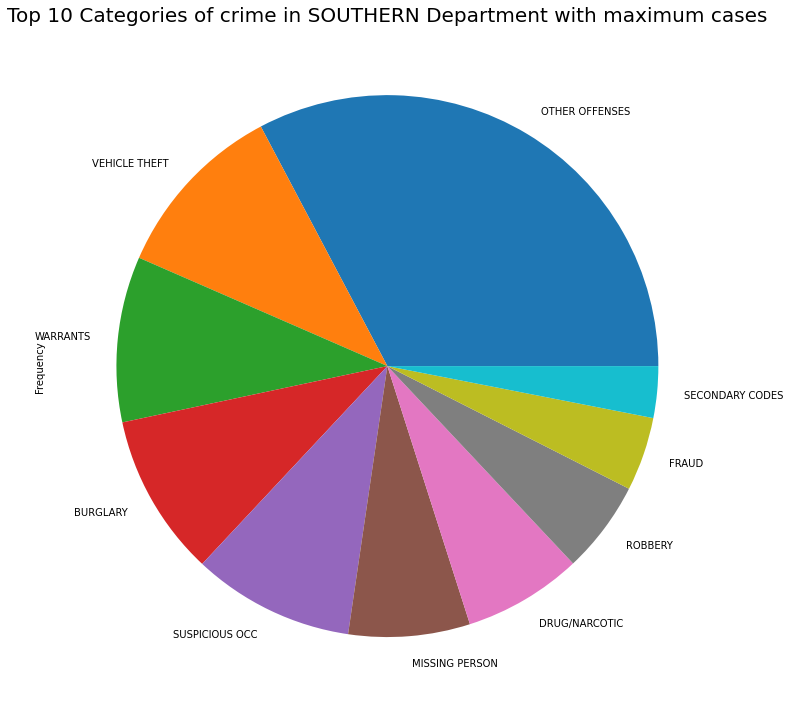

In [189]:
fcat=df[['category','department_district']][(df["category"] != 'NON-CRIMINAL')][(df["category"] != 'LARCENY/THEFT')][(df["category"] != 'ASSAULT')][(df["category"] != 'VANDALISM')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='pie', xlabel='Categories', ylabel='Frequency')
plt.title("Top 10 Categories of crime in SOUTHERN Department with maximum cases",fontsize = 20)
plt.show()

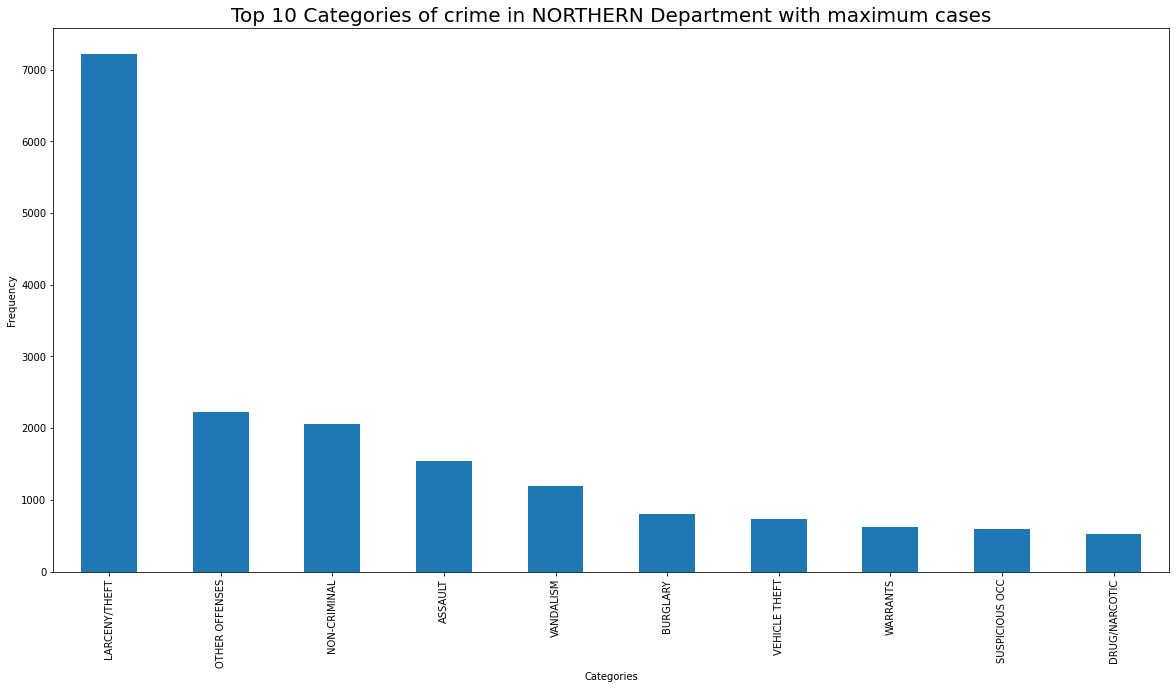

In [119]:
fcat=df[['category','department_district']][(df["department_district"] == 'NORTHERN')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='bar', xlabel='Categories', ylabel='Frequency')
plt.title("Top 10 Categories of crime in NORTHERN Department with maximum cases",fontsize = 20)
plt.show()

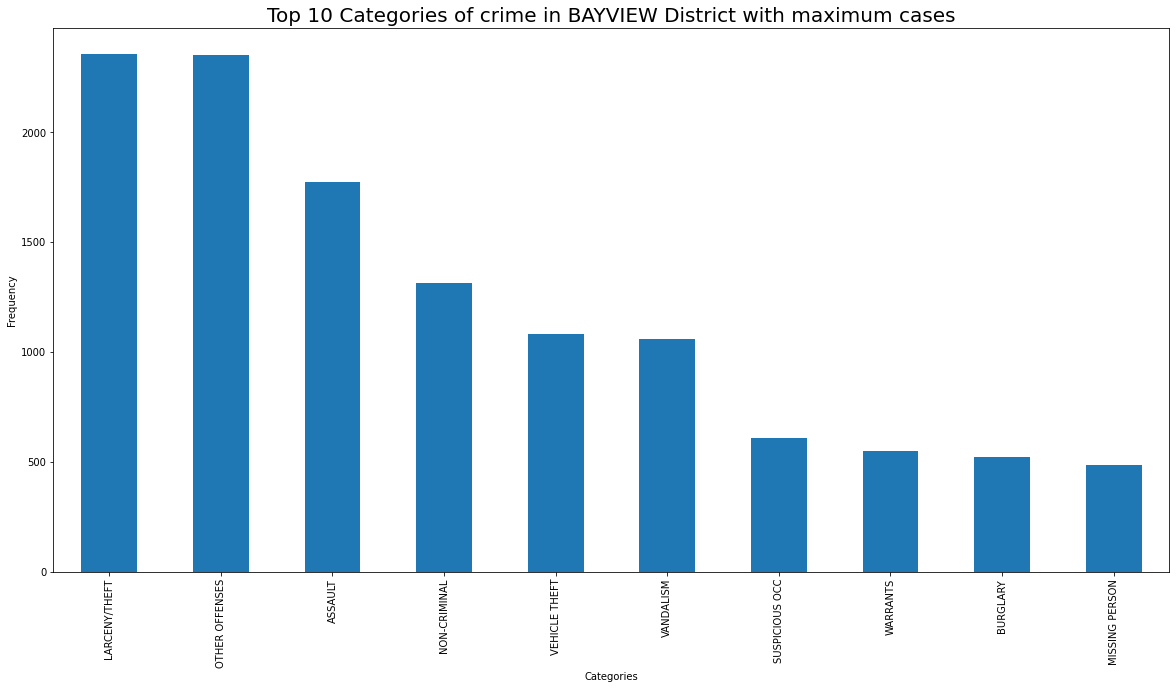

In [122]:
fcat=df[['category','department_district']][(df["department_district"] == 'BAYVIEW')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='bar', xlabel='Categories', ylabel='Frequency')
plt.title("Top 10 Categories of crime in BAYVIEW District with maximum cases",fontsize = 20)
plt.show()

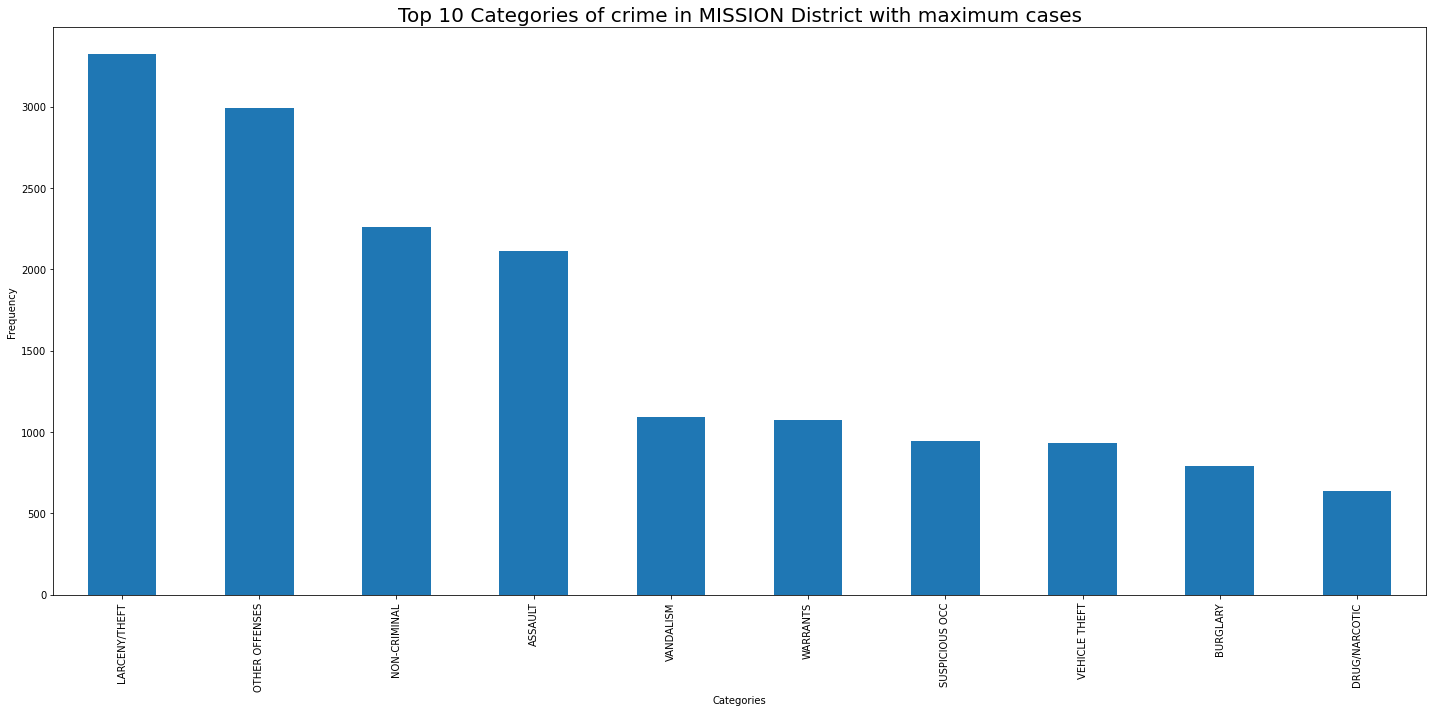

In [165]:
fcat=df[['category','department_district']][(df["department_district"] == 'MISSION')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='bar', xlabel='Categories', ylabel='Frequency')
plt.title("Top 10 Categories of crime in MISSION District with maximum cases",fontsize = 20)
plt.show()

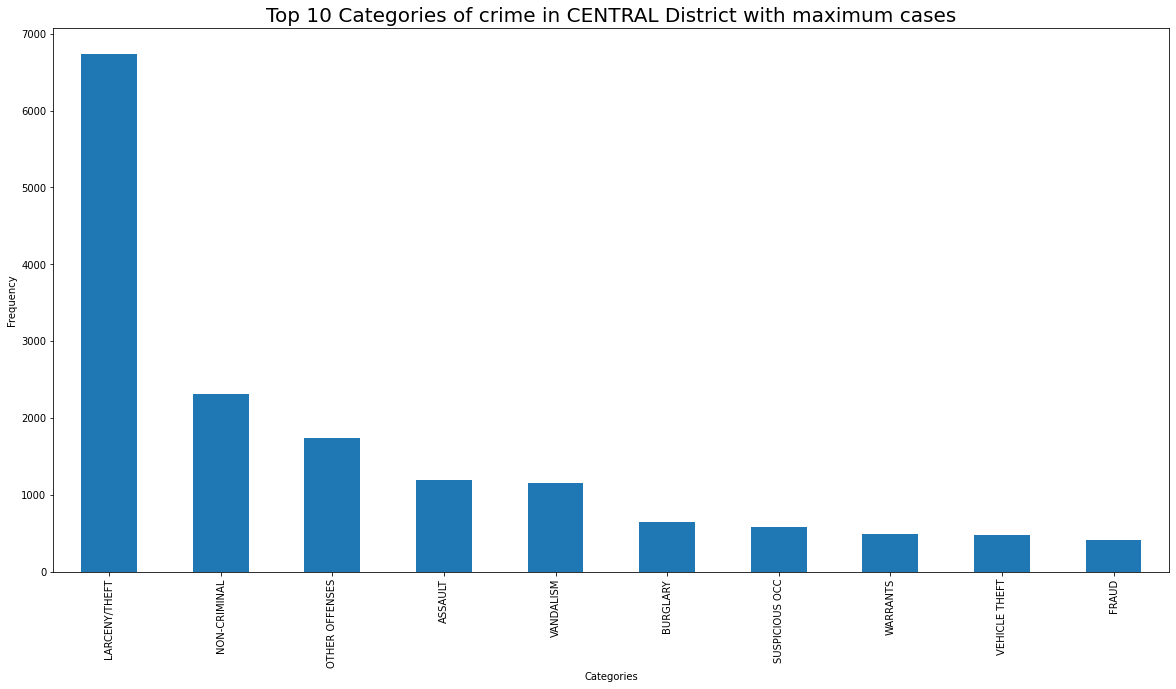

In [124]:
fcat=df[['category','department_district']][(df["department_district"] == 'CENTRAL')]
fig, ax = plt.subplots(figsize=(20,10))
fcat['category'].value_counts().nlargest(10).plot(ax=ax, kind='bar', xlabel='Categories', ylabel='Frequency')
plt.title("Top 10 Categories of crime in CENTRAL District with maximum cases",fontsize = 20)
plt.show()

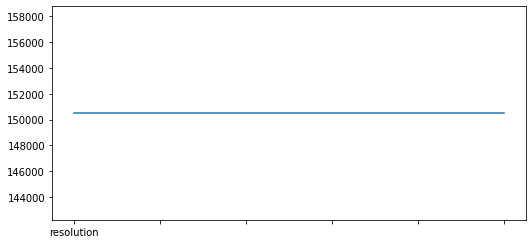

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
df = pd.read_csv('/Police-useful2.csv')
headers = ['department_district', 'category', 'resolution']


df.set_index('department_district').count().plot()

plt.show()

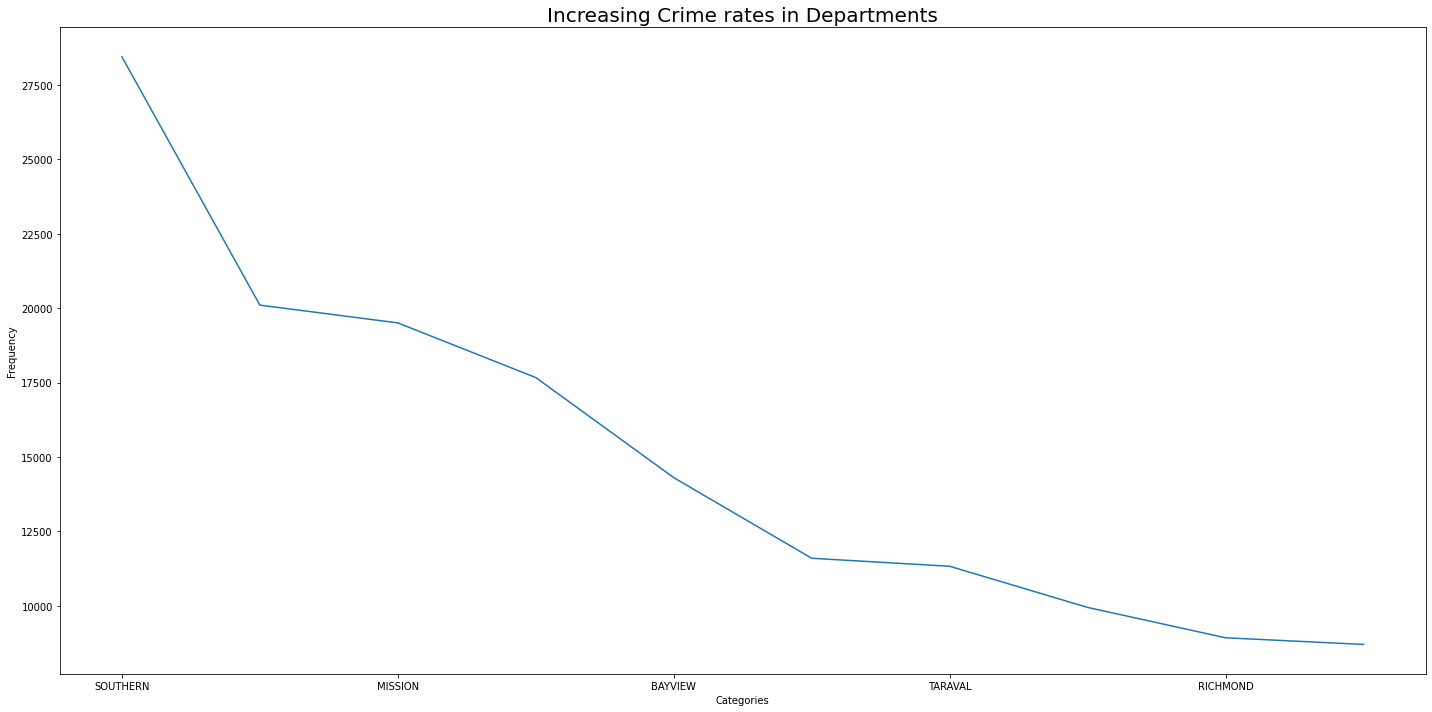

In [142]:
fcat=df[['category','department_district']]
fig, ax = plt.subplots(figsize=(20,10))
fcat['department_district'].value_counts().plot(ax=ax, kind='line', xlabel='Categories', ylabel='Frequency')
plt.title("Increasing Crime rates in Departments",fontsize = 20)
plt.show()